# Workshop - Working with images in Python

Hello all - **welcome to the first module of the DAIM (Imaging) course!** We hope you learn lots during this course, and please contact one of the course leads if you have any questions or feedback.

By the end of this workshop, you should be able to:

* Understand the basics of PIL
    * Open and show images with PIL
    * Rotate and crop images with PIL
* Understand the basics of working with images in NumPy
    * Determine the shape of a NumPy array
    * Understand how to slice arrays 
    * Understand principles of basic code refactoring
* Be able to convolve kernels with images with PIL
    * Create and apply an averaging kernel to an image
    * Write a example filtering function using PIL's built in filters


### Introduction - Importing packages

First, let's start by importing all of the relevant packages that we will be using throughtout the workshop. This will be:
* PIL (Python Image Library)
* NumPy

If you would like a recap of how these libraries work, review the slides from the pre-workshop seminar.

In [1]:
from PIL import Image
import numpy as np

## Tips

* During the workbook, you can use `display(image_variable)` to display any PIL images that you have created inline in the notebook.

# Section 1 - Using the PIL

## Exercise 1 - Opening an image

Let's start by opening an image. Import the PIL library, open `"tower.png"`, and display the image. Use [this resource](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html) or the Section 1 seminar slides to help you.

In [2]:
# Type your code here...

### Solution 1

In [3]:
#@title
from PIL import Image
im = Image.open("./tower.jpeg")
display(im)

The `im.show()` method is an easy way to inspect images when working with them in Python. PIL can also do basic image manipulations, such as cropping, rotating, and downscaling.

## Exercise 2 - Resizing an image

Get the current size of the image using the `im.size` property and reduce the size of the image by half using the `.resize()` method. Look this up online if you are unsure how to use it. *Hint: use the `//` (floor division) operator...*


In [4]:
# Type your code here...

### Solution 2

In [5]:
#@title
# Get current size and divide it by two
width, height = im.size
new_size = (width // 2, height // 2)

im_small = im.resize(new_size)
display(im_small)

If you print the new size of the image you'll see that the dimensions of the image have reduced by half.

In [6]:
print(im_small.size)

(384, 512)


## Exercise 3 - Rotating images

Rotate this modified image so that it is upside down and save it as a new image called `modified_im`, then display the image. [This documentation is useful](https://pillow.readthedocs.io/en/stable/reference/Image.html).

In [7]:
# Type your code here...

### Solution

In [8]:
#@title

im_rotated = im.rotate(180)
display(im_rotated)

**N.B.** A common pitfall with Python packages is forgetting if a method affects the original object or not. 
1. If the method does affect the original image, then you don't need to use an extra variable, or modify the original one. For example, `list.append("MI")` appends `"MI"` to the original list.
2. If the method does not affect the original image, then you need to use an extra variable for the result, or the variable itself. For example, `list.count("MI")` counts the number of times that `1` appears in the list, and then returns it.

Code which demonstrates this is shown below. All the PIL methods we've used so far **do not** modify the original image.

In [9]:
list = ["PE", "stroke", "dissection"]

# Method affects the original object
appended_list = list.append("MI")
print(appended_list)    # This doesn't exist...
print(list)             # ...But the original list has been modified.

# Method does not affect the original object
number_of_mis = list.count("MI")
print("Number of MIs in list: ", number_of_mis)

None
['PE', 'stroke', 'dissection', 'MI']
Number of MIs in list:  1


## Exercise 4 - Cropping an image

PIL can also be used to crop images. This can be useful when only a certain part of the image is relevant to an analysis.

When cropping images, it's important to be aware of the [coordinate system that PIL uses](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#coordinate-system). It defines the pixel `(0, 0)` as the top-left corner, with y-coordinates increasing "down" the image, and x-coordinates increasing from left to right across the image.

[Visual of the coordinate system using the `im_small` image as an example ](images/coordinate_system.png)

For this task, the following region should be extracted from the image called `im_small` which we created in a previous cell:

* *A square box around the image that has a dimension of 150 by 150, centered on the point (200, 210).*

The documentation for this function can be found [here](https://pillow.readthedocs.io/en/stable/reference/Image.html).

In [10]:
# Type your code here...

# Solution

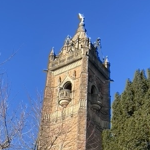

In [45]:
#@title

center_x, center_y = (200, 210)
dim = 150

right = center_x + dim // 2
left  = center_x - dim // 2

upper = center_y - dim // 2
lower = center_y + dim // 2

im_cropped = im_small.crop((left, upper, right, lower))
display(im_cropped)

Make sure that bear this coordinate system in mind when using PIL, as it can feel slightly counter-intuitive: "upper" coordinates in the y-direction are further down in the image.

## Exercise 5 - Converting an image to grayscale

Images often need to be converted to greyscale before input into image processing algorithms or machine learning algorithms as it reduces them from 3 channels of data to 1 channel of data, changing the shape of the underlying data. More information on this concept can be found in the seminar slides before this workshop, and we will explore it here.

The task is:
* Write a function which:
    * Accepts a PIL image
    * Converts the image to a NumPy array
    * Prints the shape of the resulting array
* Next, create a copy of the `im_cropped` image.
    * Convert this copy from a colour image into a greyscale image.
* Use your function to print the shape of the image before and after the conversion. 

*What do you notice about the shape of the image when it is converted to greyscale?*

If you have any questions about any step in the above process, try to use Google searching appropriately to find the answer. Including the language (python) and the package you are using (PIL, NumPy) will help to return helpful responses.

### Solution

(150, 150, 3)
(150, 150)


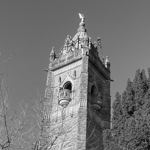

In [12]:
#@title

im_grey = im_cropped 

def print_img_shape(target_im):
    arr = np.array(target_im)
    print(arr.shape)

print_img_shape(im_grey)
im_grey = im_grey.convert('L')
print_img_shape(im_grey)

im_grey

The conversion to NumPy removes the last channel, so the image is `(150, 150)` rather than `(150, 150, 1)`. This is important, as some algorithms require this last channel in the shape of the image to be declared explicitly. *More on this later in the course...*

## Exercise 6 - Saving images to file

After you've processed the image, you may want to save the image as a file so that it can be shared and reused later. 

* Save the `im_cropped` image to `images/tower_processed.png` using PIL.
* Use the internet to help you find documentation.

In [13]:
# Type your code here...

### Solution

In [14]:
#@title

file_path = "./images/tower_processed.png"
im_cropped.save(file_path)

# Section 2 - Images in NumPy

Next, we will cover how images are used and manipulated with NumPy. This is "lower level" than the functions used in PIL, and requires some understanding of how the data is represented under the hood. If you would like a refresher on this, please refer back to the seminar slides on image representation.

## Exercise 7 - Opening an image with NumPy

Open the `tower_processed.png` image that we created in Exercise 6 with PIL, and then convert it into a NumPy array. Print the shape of the image using NumPy. 

The message should appear in the output as shown below. Try to use **string formatting** to do this! Look this up online or ask a tutor if you are unsure what this is. String formatting is a elegant and powerful way to print variables in your code to the terminal.

`Shape of tower image: (integer, integer, integer)`

In [ ]:
# Type your code here..

### Solution

In [17]:
#@title

im = Image.open("./images/tower_processed.png") 
im # Let's have a look at the image first...

im_arr = np.asarray(im)
print(f"Shape of tower image: {im_arr.shape}")

Shape of tower image: (150, 150, 3)


## Exercise 8 - Datatypes in an image array

Now we know more about the image, let's dig deeper into the way that it's represented within NumPy. Write some code to print the first pixel in the image in the top left corner. This is at address (0, 0) - if you need a refresher on the coordinate system of an image, refer to the Exercise 4 of the workshop. Make sure you print all values in the pixels - this is a colour image and therefore has 3 channels - one for red, green, and blue (RGB) respectively.

Next, print the datatype of the array. You may find [this documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html) helpful. 

A key feature of NumPy arrays is that they are **homogenous**, which means they only contain **one datatype**. This could be anything:

* Integers (`42`)
* Floats (`42.000`)
* Strings (`"The meaning of life"`)

Once you've done this, look up the datatype online - what do you think the highest and lowest pixel value in the image will be? 

In [ ]:
# Type your code here...

### Solution

In [37]:
#@title

first_pixel = im_arr[0, 0, :]
print(first_pixel)
print(f"Datatype of array: {im_arr.dtype}")

[ 55 106 197]
Datatype of array: uint8


The datatype of the array is `uint8` - an unsigned 8-bit integer:

* `"u"` - unsigned
    * This number can only be greater than 0, as there is no negative sign represented.
* `"int"` - integer
    * This represents an integer, a whole number.
* `"8"` - 8-bit
    * The underlying code is representing this number with 8 bits.

The maximum value that an unsigned 8 bit number can represent is 255 and the minimum value it can represent is 0.

## Exercise 9 - Conversion to colour code

Now for a more involved coding task: convert the `first_pixel` NumPy array from an array of integers into a hex colour code. These codes were explained in the seminar, and have the form `#FF00FF`, where each successive two characters represent a colour for the RGB channels. In this case, red is `"FF"`, green is `"00"`, and blue is `"FF"`. In this case, this would represent a strong mix of red and blue - bright violet. 

Start by writing a function to convert an integer from the pixel to the hexadecimal string format shown above (e.g. `255` to `"FF"`). Next, use string formatting to put the numbers from `first_pixel` together with the hash (`#`) symbol to form the full code.

In [ ]:
## Type your code here...

### Solution

Hex code: #376AC5


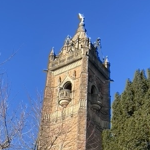

In [36]:
def colour_to_hex(pixel):
    hex_str = hex(pixel)        # Convert the pixel value to hexadecimal (e.g. 0x3a).
    hex_str = hex_str.upper()   # Convert all the letters to upper case (e.g. 0X3A).
    
    # The hex number has `0x` on the front, which is removed (e.g. 3A).
    return hex_str[2:] 

hex_vals = [colour_to_hex(x) for x in first_pixel] # Convert integers to hexadecimal
hex_code = "#" + "".join(hex_vals)                 # Join the RGB values into the hex code.

print(f"Hex code: {hex_code}")

# Show image for reference
im

If you look this hex code up online, you'll see that it is a shade of sky blue - which makes sense as the top-right of the image was the sky above Brandon Tower.

## Exercise 10 - Image slicing

We've talked about RGB images a lot so far in the workshop, but we haven't looked at each of these channels directly yet. A `(150, 150, 3)` colour image can be viewed as a collection of 3 grescale `(150, 150)` images. To extract these, we will need to slice the image array.

Extract each of the red, green and blue channels, convert them to greyscale PIL images, and display them. You may find [this documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.fromarray) helpful.

In [ ]:
# Type your code here...

### Solution

Red channel


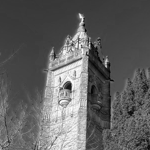

Blue channel


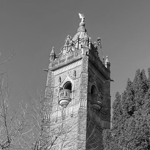

Green channel


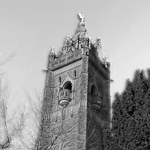

In [44]:
#@title

red_arr = im_arr[:, :, 0]
green_arr = im_arr[:, :, 1]
blue_arr = im_arr[:, :, 2]

red_im = Image.fromarray(red_arr)
green_im = Image.fromarray(green_arr)
blue_im = Image.fromarray(blue_arr)

print("Red channel")
display(red_im)
print("Green channel")
display(green_im)
print("Blue channel")
display(blue_im)

You can see from the blue channel image that it is brightest in the sky area of the image, as the sky is predominantly blue in this image. The bright values in the channel indicate a large contribution to the overall colour of the image from this channel. In the sky region, the values of the red and blue channels are darker, indicating that there is less of these colours making up the colour of the sky.

## Exercise 11 - Cleaning up code

Often, code will get duplicated, as in the example solution to Exercise 10. The appearance and reusability of the code can be increased by **refactoring** the code. This refers to the process of modifying the code to look cleaner but perform the same functionality.

Can you refactor the example solution to Exercise 10 to occur in 5 lines of code rather than 12?

In [ ]:
# Type your solution here...

### Solution

Red channel


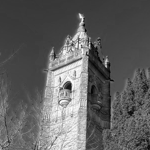

Green channel


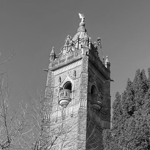

Blue channel


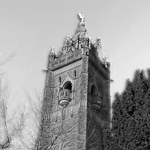

In [47]:
channel_names = ["Red channel", "Green channel", "Blue channel"]

for i in range(3):
    print(channel_names[i])
    channel_im = Image.fromarray(im_arr[:, :, i])
    display(channel_im)

# Break and Sandbox

Feel free to take the next 15 minutes as a break. If you are back before this time, use the space below to experiment with the image packages to get a better feel for how image representation works within PIL and NumPy. Some questions to answer could be:

* What happens if you remove a channel from an image?
* What happens if you divide all the values in the image by 2?
* What happens if you add or subtract a number to all the elements of an image?

Some code which answers the first question has been written below...

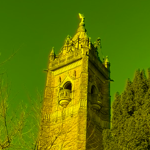

In [71]:
# Create a copy of the original image as a numpy array
im_arr = np.asarray(im).copy()

# Answer your question...
# Remove the blue channel (3rd channel, zero-indexed) from the image by setting all the values to 0.
im_arr[:, :, 2] = 0

# Convert back to PIL and display the image.
im_noblue = Image.fromarray(im_arr)
display(im_noblue)

# Section 3 - Convolution

Next, we will use both packages and our knowledge of convolution to process some images. If you would like to refresh your memory on convolution, please refer back to the seminar.

Convolution is one way of applying a filter to an image, and so the term filtering will come up multiple times in this section. The first two exercises focus on creating and applying a custom convolution kernel, and the last exercise involves using more general Python skills with PIL's built-in filters to process an image.

Convolution can be used for a wide variety of tasks, including image sharpening, blurring, and edge detection within images. NumPy can perform convolution, but only for 1-dimensional arrays. For image convolution (2-dimensional arrays), we will need to use the convolution functionality within PIL. To do this, we need to import the `ImageFilter` module of PIL:

In [73]:
from PIL import ImageFilter

## Exercise 12 - Creating an averaging kernel

The first exercise we will complete is a definition of an averaging kernel. These kernels "look" at a small tile of an image and caluclate the mean average of the values of all the pixels. As a reminder...

`mean = (v1 + v2 + v3) / 3`

The kernel in this case is a 3 by 3 square kernel of 1s. The kernel of 1s will multiply all the values in the tile by 1, which ensures an equal contribution from each pixel. Then, the value of all the pixels in the tile will be added together and divided by the total number of pixels in the tile, which is 9 in this case.

In this exercise, use the `ImageFilter.Kernel()` method to create a PIL averaging kernel. It should be a 3 x 3 square of 1, divided by the total number of elements in the array. You may find [this documentation](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) useful - search for the `ImageFilter.Kernel()` method. Additionally, search online for help with the task to find more information about creating kernels with PIL.

Tips:
* `ImageFilter.Kernel()` accepts the kernel as a "flattened" array, rather than a square NumPy array.

In [ ]:
# Type your code here...

### Solution

In [88]:
#@title

kern_mean = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])
kern_scale_fac = np.sum(kern_mean)

filter_sharp = ImageFilter.Kernel((3, 3), kern_mean.flatten(), kern_scale_fac, 0)

## Exercise 13 - Averaging an image

We've created the kernel, and we can now apply it to the image. These averaging kernels can be applied to an image multiple times to achieve more or less pronounced effects. 

For the next exercise, write a function called `average_img` which uses the code you created in the previous step to create an averaging kernel, and then averages the image multiple times. The function should have two arguments:

* `target_im` - the PIL image to which the kernel will be applied.
* `iterations` - the number of times that the kernel will be applied to the image. The default value of the argument should be 1.

The kernel can be applied to the image using the `im.filter(kernel)` method. [This documentation](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html), referenced in the previous exercise, also covers applying the kernel to an image.

After writing the function, open an image (`./cat_2.png`), use the function to average the image, and display the image. Experiment with the value of `iterations` to average the image more or less aggressively.

In [ ]:
# Type your code here...

### Solution

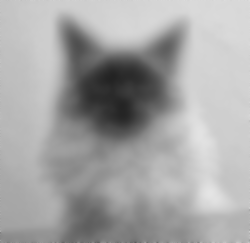

In [91]:
#@title

def average_img(target_im, iterations=1):

    kern_mean = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ])
    kern_scale_fac = np.sum(kern_mean)

    filter_sharp = ImageFilter.Kernel((3, 3), kern_mean.flatten(), kern_scale_fac, 0)

    for _ in range(iterations):
        target_im = target_im.filter(filter_sharp)

    return target_im

# Open the image of the cat.
im = Image.open("./cat_2.png")

iterations = 100
ave_im = average_img(im, iterations)

display(ave_im)

## Exercise 14 - General Filtering Function

PIL provides some built-in filtering operations, which can be found in [this documentation](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html). In this exercise, we will create an easy-to-use function which will be able to apply a range of filters to an image multiple times.

Create a function called `filter_image` which takes the following arguments:

* `target_im` - the input image
* `filter_type` - a short string which specifies the filter that will be applied.
* `iterations` - the number of times the filter is applied to the image. This should default to 1.

The function should return the processed image. The following filters should be supported: `BLUR`, `EDGE_ENHANCE`, and `DETAIL`. The following input strings should be used to specify these: `"blur", "sharpen", "detail"`. An example of how the function should work is given below.

```python
im_blurred = filter_image(im, "blur", 3)
```

The code that you designed in the previous exercise will give you a good starting point. Use [the documentation](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) to help you. When designing the function, think about the best way to convert from the strings to the filter types. 

Try out your function on the cat image to see its effects. You can also try it on the `tower_processed.png` image that we created earlier - does the colour have any effect on the function? 

In [ ]:
# Type your code here...

### Solution

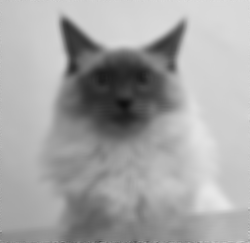

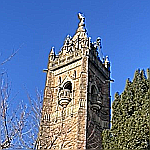

In [120]:
#@title

def filter_image(target_im, filter_type, iterations=1):

    filter_lookup = {
        "blur": ImageFilter.BLUR,
        "sharpen": ImageFilter.EDGE_ENHANCE,
        "detail": ImageFilter.DETAIL
    }

    # Use a dictionary to look-up the appropriate filter.
    # The specifier from the user is the key, and the actual
    # filter is the value. 
    target_filter = filter_lookup[filter_type]

    for _ in range(iterations):
        target_im = target_im.filter(target_filter)

    return target_im

# Open the image of the cat.
im = Image.open("./cat_2.png")
im_filtered = filter_image(im, "blur", 3)

display(im_filtered)

# Open the processed tower image.
im = Image.open("./images/tower_processed.png")
im_filtered = filter_image(im, "sharpen", 1)

display(im_filtered)

Notice the subtle boundary effects around the edgees of each of these images. When a kernel is applied to each pixel in an image, the pixels on the edges have less than 8 neighbours for the kernel to "look at". This can be dealt with in multiple ways:

* "Padding" with a value (usually zero or the maximum pixel value)
* Ignoring these pixels
    * Removes the problem, but reduces the resolution of the image.

This is important, as it effects the way an image is processed. Consider this case study:

> A researcher is designing a new algorithm to outline the mediastinum in a chest XR. They approach this by cropping image to a square, applying some preprocessing, and then using a edge detection convolution kernel. The algorithm works by extracting all the edges in the image and then it selects the longest unbroken, continuous edge that has been detected. They notice that all the mediastina that have been detected are square.

Why has this bug occurred? 

This has occurred because the process of convolution has padded the image with zeros. This has resulted in an edge being detected between the border of the image and the image itself, which is square. This is longer than the mediastinum border, which is then ignored by the algorithm.

This bug could be fixed by instructing the convolution function to not pad the image. This can often be done with arguments to the function from the package that is performing the convolution. We will encounter this again later in the course during the AI unit.

## Questions

You have come to the end of the first workshop in DAIM - we hope you've enjoyed it. Please let us know if you have any feedback or any parts of the workbook that could be improved.